In [160]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)
df07=pd.read_spss('pew2007.sav')
df14=pd.read_spss('pew2014.sav')
##Relevant Columns:
##07: Q16: Religion Affiliation
##14: qe1: Religion Affiliation
##07: STATE: state
##14: state: state

In [161]:
import matplotlib as mpl
from matplotlib import pyplot as plt

In [162]:
re07=df07[['STATE','Q16']]

In [163]:
re14=df14[['state','qe1']]

In [164]:
df07.replace('Nothing in particular', 'No Affiliation', inplace=True)
df07.replace('Agnostic (not sure if there is a God)','No Affiliation', inplace=True)
df07.replace('Atheist (do not believe in God)', 'No Affiliation', inplace=True)

In [165]:
df14.replace('Nothing in particular', 'No Affiliation', inplace=True)
df14.replace('Agnostic (not sure if there is a God)','No Affiliation', inplace=True)
df14.replace('Atheist (do not believe in God)', 'No Affiliation', inplace=True)

In [166]:
re07['Q16'].value_counts(normalize=True).head(4)

Protestant          0.516172
Roman Catholic      0.226319
No Affiliation      0.141973
Jewish (Judaism)    0.019181
Name: Q16, dtype: float64

In [167]:
df07.replace('Christian (Vol.)', 'Other Christian', inplace=True)
df07.replace('Mormon (Church of Jesus Christ of Latter-day Saints/LDS)','Other Christian', inplace=True)
df07.replace('Orthodox (Greek, Russian, or some other orthodox church)', 'Other Christian', inplace=True)

In [168]:
df14.replace('Christian (Vol.)', 'Other Christian', inplace=True)
df14.replace('Mormon (Church of Jesus Christ of Latter-day Saints/LDS)','Other Christian', inplace=True)
df14.replace('Orthodox (Greek, Russian, or some other orthodox church)', 'Other Christian', inplace=True)

In [169]:
mare07=re07[re07['STATE']=='Massachusetts']

In [170]:
mare14=re14[re14['state']=='Massachusetts']

In [171]:
big4=re07['Q16'].value_counts(normalize=True).index[:4].tolist()

In [172]:
maperc07=mare07['Q16'].value_counts(normalize=True)

In [173]:
big4datama07=[]
for i in range(len(big4)):
    big4datama07=big4datama07+[maperc07.loc[big4[i]]]

In [174]:
maperc14=mare14['qe1'].value_counts(normalize=True)
naperc14=re14['qe1'].value_counts(normalize=True)

In [175]:
big4datama14=[]
for i in range(len(big4)):
    big4datama14=big4datama14+[maperc14.loc[big4[i]]]

In [176]:
big4datana14=[]
for i in range(len(big4)):
    big4datana14=big4datana14+[naperc14.loc[big4[i]]]

<IPython.core.display.Javascript object>


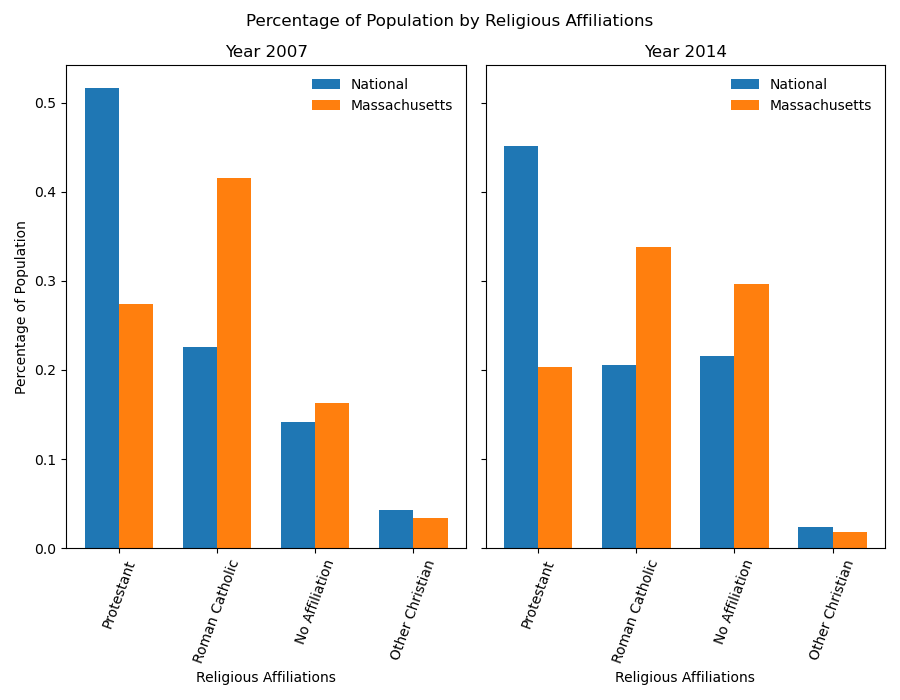

In [186]:
%matplotlib Notebook
fig, (ax1,ax2)=plt.subplots(1,2,sharey=True, figsize=(9,7))


index=np.arange(len(big4))
bar_width=0.35

plt.suptitle('Percentage of Population by Religious Affiliations')

National=ax1.bar(index, re07['Q16'].value_counts(normalize=True).head(4),bar_width,label='National')
Mass=ax1.bar(index+bar_width, big4datama07,bar_width,label="Massachusetts")

ax1.set_xlabel('Religious Affiliations')
ax1.set_ylabel('Percentage of Population')
ax1.set_title('Year 2007')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(big4, rotation=70)
ax1.legend(frameon=False)

National1=ax2.bar(index, big4datana14,bar_width,label='National')
Mass1=ax2.bar(index+bar_width, big4datama14,bar_width,label="Massachusetts")

ax2.set_xlabel('Religious Affiliations')
ax2.set_title('Year 2014')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(big4, rotation=70)

ax2.legend(frameon=False)

plt.tight_layout()

plt.savefig('Assignment4')